In [1]:
import numpy as np

In [2]:
# 데이터 생성
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
print(train_input)
print("-------------------------")

test_input = test_input.reshape(-1, 1)
print(test_input)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
-------------------------
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


In [5]:
from sklearn.neighbors import KNeighborsRegressor

In [6]:
knr = KNeighborsRegressor(n_neighbors=3)
knr

KNeighborsRegressor(n_neighbors=3)

In [7]:
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [8]:
knr.score(test_input, test_target)

0.9746459963987609

- 예측값, 이웃데이터 포함 산점도 그리기

In [9]:
knr.predict([[100]])

array([1033.33333333])

In [10]:
distances, indexes = knr.kneighbors([[50]])
print(distances)
print(indexes)

[[6. 7. 7.]]
[[34  8 14]]


In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'weight')

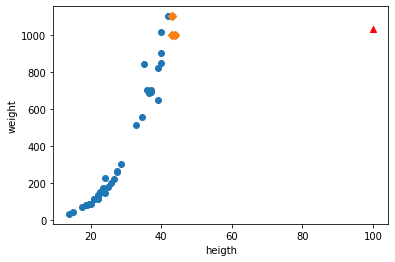

In [12]:
plt.scatter(train_input, train_target)
plt.scatter(100, 1033, marker="^", c='red')
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.xlabel('heigth')
plt.ylabel('weight')

### 선형회귀(Linear Regression)
##### - 많이 사용되는 대표적인 회귀 알고리즘
##### - 비교적 간단, 성능 뛰어나서 회귀모델 수행시 초반에 주로 진행
##### - 선형회귀 역할 : 하나의 특성을 가장 잘 나타내는 직성을 찾아내는 것이 주역할
##### - 직선을 '추세선' 이라고 함
##### - 선형회귀 알고리즘 : 1차 방정식(y = as + b)
##### - 선형회귀 클래스(모델) : LinearRegresin
##### - 사용되는 패키지 : sklearn.linear_model

In [15]:
### 선형회귀 클래스(모델) 생성하기
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [21]:
### 사용 데이터 : train_input, train_target, test_input, test_target
### 예측 데이터 : 길이 50cm

# lr 모델 훈련 > 예측데이터로 예측
lr.fit(train_input, train_target)  # 훈련모델 생성
lr.score(test_input, test_target)
lr.predict([[50]])

0.824750312331356
[1241.83860323]


In [23]:
### 일차방정식의 기울기와 y절편값 확인하기
# 일차 방정식 : y = ax + b
# a = 기울기(coef)
# b = y절편(intercept)
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


Text(0, 0.5, 'weight')

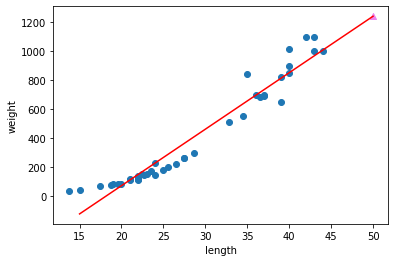

In [41]:
### 추세선을 이용하여 예측데이터 예측가능한지 확인
# -예측데이터로 사용할 수 있는지 확인
# - 산점도를 이용해서 확인
# - 훈련데이터, 예측데이터 산점도로 그리기
plt.scatter(train_input, train_target)
plt.scatter(50,1241.8386, marker='^',c='violet')

# 추세선 그리기
# 추세선 : 선형회귀 알고리즘(1차방정식)이 훈련데이터에서 찾은 최적의 직선을 의미
plt.plot([15,50], [lr.coef_ * 15 + lr.intercept_, lr.coef_ * 50 + lr.intercept_], c= 'red' )

plt.xlabel('length')
plt.ylabel('weight')

In [47]:
### 훈련데이터와 테스트데이터의 과적합여부 확인
# - KNN은 과소적합 나옴
# - LR 모델은 개선 되었는지 확인

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

### (해석)
# - 테스트 결과가 다소 낮게 나왔으며, 훈련데이터는 높은편
# - 다소 차이는 있으나 우수한 모델로 평가는 할 수 있음
# - 단, 훈련데이터와 테스트데이터의 결정계수의 차이는 의심을 해봐야 합니다.

### 그래프 왼쪽 하단의 산점도 분포가 조금 특이
# - 약간의 round(곡선)을 띄고 있습니다
# - 추세선의 왼쪽 하단으로 직선을 연장했을 때
#   y축이 0이하로 넘어갑니다. 무게는 0보다 작을 수 없음
#   음수를 예측하면 잘못된 모델임

0.9398463339976041
0.824750312331356


Text(0, 0.5, 'weight')

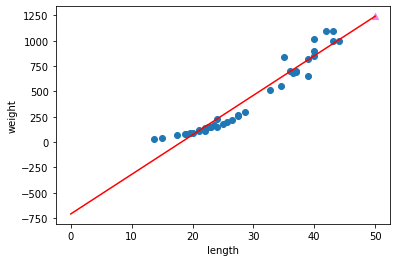

In [48]:
### 추세선을 이용하여 예측데이터 예측가능한지 확인
# -예측데이터로 사용할 수 있는지 확인
# - 산점도를 이용해서 확인
# - 훈련데이터, 예측데이터 산점도로 그리기
plt.scatter(train_input, train_target)
plt.scatter(50,1241.8386, marker='^',c='violet')

# 추세선 그리기
# 추세선 : 선형회귀 알고리즘(1차방정식)이 훈련데이터에서 찾은 최적의 직선을 의미
plt.plot([0,50], [lr.coef_ * 0 + lr.intercept_, lr.coef_ * 50 + lr.intercept_], c= 'red' )

plt.xlabel('length')
plt.ylabel('weight')

### 다항회귀분석
##### - 다항식을 사용한 선형회귀를 "다항회귀"라고도 합니다.
##### - 다항식(이차방정식) : y = ax^2 + bx +c
##### - a와 b : 계수라고 칭합니다(기울기 포함)
##### - c : y절편
##### - 독립변수 1개

In [55]:
train_input[0]**2

array([384.16])

In [52]:
len(train_input)

42

In [56]:
### 훈련데이터 train_input을 [[제곱된값1, 원래값1], [],[], ...]
train_poly = np.column_stack((train_input ** 2, train_input))
train_poly

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ],
       [ 400.  ,   20.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [1849.  ,   43.  ],
       [1600.  ,   40.  ],
       [ 576.  ,   24.  ],
       [ 441.  ,   21.  ],
       [ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 702.25,   26.5 ],
       [1332.25,   36.5 ],
       [ 187.69,   13.7 ],
       [ 515.29,   22.7 ],
       [ 225.  ,   15.  ],
       [1369.  ,   37.  ],
       [1225.  ,   35.  ],
       [ 823.69,   28.7 ],
       [ 552.25,   23.5 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [ 529.  ,   23.  ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 506.25,   22.5 ],
       [ 361.  ,   19.  ],
 

In [57]:
train_poly.shape

(42, 2)

In [58]:
test_poly = np.column_stack((test_input ** 2, test_input))
test_poly.shape

(14, 2)

예측 =  [1573.98423528]
a, b, y절편 =  [  1.01433211 -21.55792498] 116.0502107827827


Text(0, 0.5, 'weight')

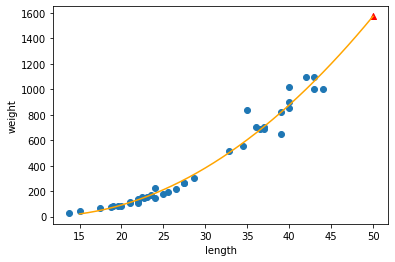

In [86]:
# - 객체(모델) 생성
lr = LinearRegression()

# - 훈련모델 생성
lr.fit(train_poly, train_target)

# - 예측데이터 : 길이 50
print("예측 = ", lr.predict([[50**2, 50]]))

# - 계수 확인(coef_, intercept_)
print("a, b, y절편 = ",lr.coef_, lr.intercept_)

# - 산점도 그리기 : 훈련, 예측 데이터, 추세선
plt.scatter(train_input, train_target)
plt.scatter([50],[1573.9842], marker='^',c='red')

# 추세선 그리기
# ax^2 + bx + 
point = np.arange(15,51)
plt.plot(point, lr.coef_[0] * point**2 + lr.coef_[1] *point + lr.intercept_, c= 'orange' )

plt.xlabel('length')
plt.ylabel('weight')

In [87]:
### 과적합 확인하기(과대 / 과소)
print("훈련 = ", lr.score(train_poly, train_target))
print("테스트 = ", lr.score(test_poly, test_target))


훈련 =  0.9706807451768623
테스트 =  0.9775935108325122


In [ ]:
### (해석)
# - 전체적으로 정확도는 낮아짐
# - 그렇지만 훈련/테스트의 결정계수는 유사하게 가까워졌기 떄문에
# - 우수한 모델이라고 할 수 있음

# - 다만 아직 훈련이 테스트보다 낮은 과소적합을 보임

### 그렇다면?
# - 복잡도를 줄 수 있는 모델을 찾아야 함
